#Import Required Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [ ]:
df = pd.read_csv("Unemployment in India.csv")
df.head()


,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural


In [ ]:
df.info()
df.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 754 entries, 0 to 753
Data columns (total 7 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    740 non-null    object 
 1    Date                                     740 non-null    object 
 2    Frequency                                740 non-null    object 
 3    Estimated Unemployment Rate (%)          740 non-null    float64
 4    Estimated Employed                       740 non-null    float64
 5    Estimated Labour Participation Rate (%)  740 non-null    float64
 6   Area                                      740 non-null    object 
dtypes: float64(3), object(4)
memory usage: 41.4+ KB


Index(['Region', ' Date', ' Frequency', ' Estimated Unemployment Rate (%)',
       ' Estimated Employed', ' Estimated Labour Participation Rate (%)',
       'Area'],
      dtype='object')

# Data Cleaning

In [ ]:
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')
df.rename(columns={
    'estimated_unemployment_rate_(%)': 'unemployment_rate',
    'estimated_employed': 'employed',
    'estimated_labour_participation_rate_(%)': 'labour_participation_rate'
}, inplace=True)

# Convert date to datetime format
df['date'] = pd.to_datetime(df['date'])

# Check for missing values
print(df.isnull().sum())

region                       14
date                         14
frequency                    14
unemployment_rate            14
employed                     14
labour_participation_rate    14
area                         14
dtype: int64


/tmp/ipython-input-7-478234408.py:9: UserWarning: Parsing dates in  %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['date'] = pd.to_datetime(df['date'])


# Data Visualization

/tmp/ipython-input-13-1359314292.py:4: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title="Region", loc="upper left", bbox_to_anchor=(1, 1))


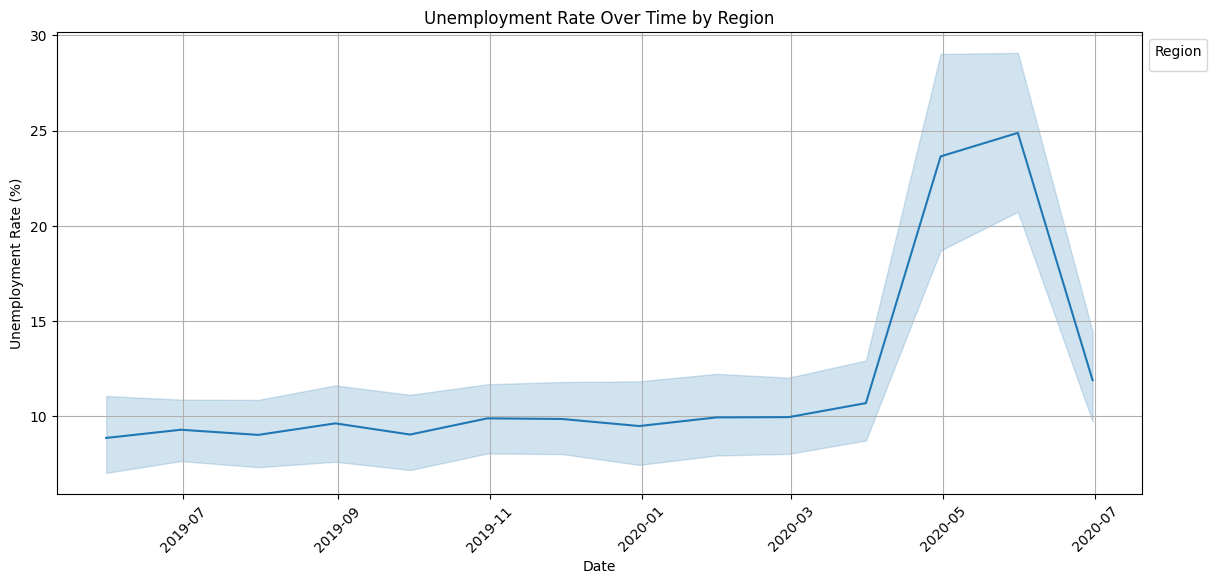

In [ ]:
plt.figure(figsize=(14,6))
sns.lineplot(data=df, x='date', y='unemployment_rate')
plt.xlabel("Date")
plt.legend(title="Region", loc="upper left", bbox_to_anchor=(1, 1))
plt.title("Unemployment Rate Over Time by Region")
plt.ylabel("Unemployment Rate (%)")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

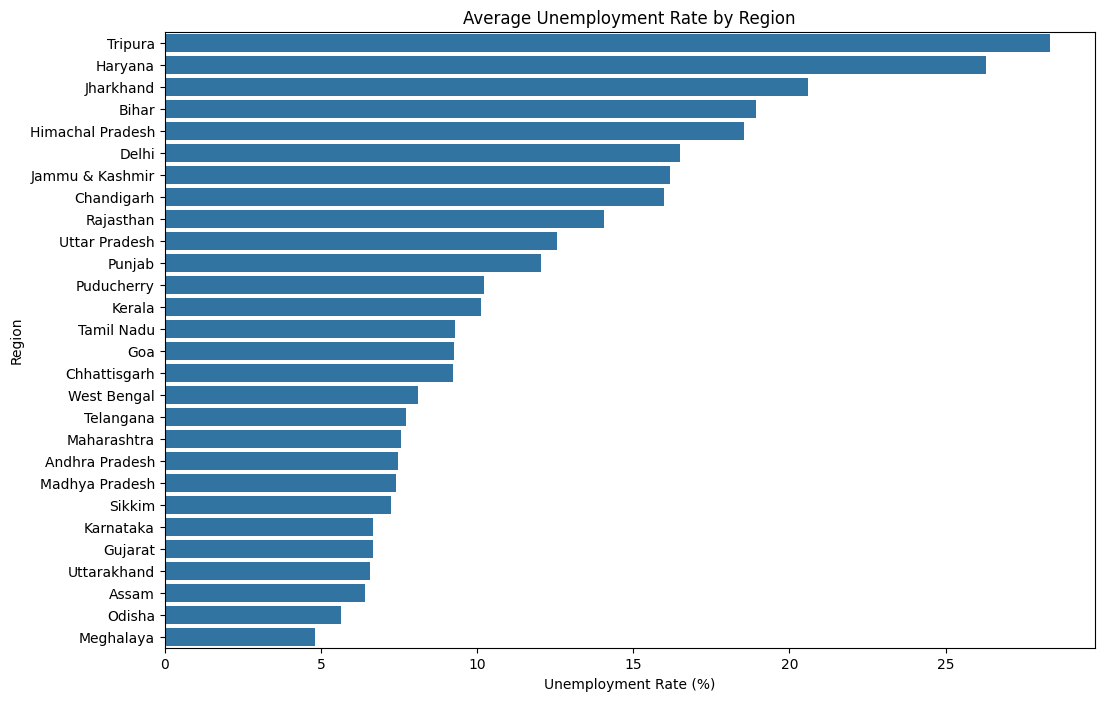

In [ ]:
region_avg = df.groupby('region')['unemployment_rate'].mean().sort_values(ascending=False)

plt.figure(figsize=(12,8))
sns.barplot(x=region_avg.values, y=region_avg.index)
plt.title("Average Unemployment Rate by Region")
plt.xlabel("Unemployment Rate (%)")
plt.ylabel("Region")
plt.show()


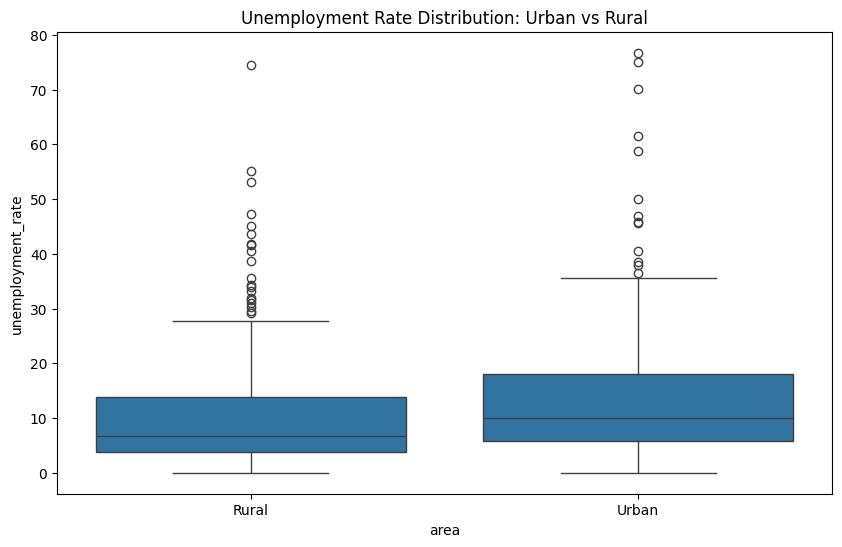

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x='area', y='unemployment_rate')
plt.title("Unemployment Rate Distribution: Urban vs Rural")
plt.show()

# COVID-19 Impact Analysis

In [ ]:
pre_covid = df[df['date'] < '2020-03-01']
post_covid = df[df['date'] >= '2020-03-01']

print("Average Unemployment Rate - Pre-COVID:", pre_covid['unemployment_rate'].mean())
print("Average Unemployment Rate - Post-COVID:", post_covid['unemployment_rate'].mean())


Average Unemployment Rate - Pre-COVID: 9.509533582089553
Average Unemployment Rate - Post-COVID: 17.774362745098042


# Correlation Analysis

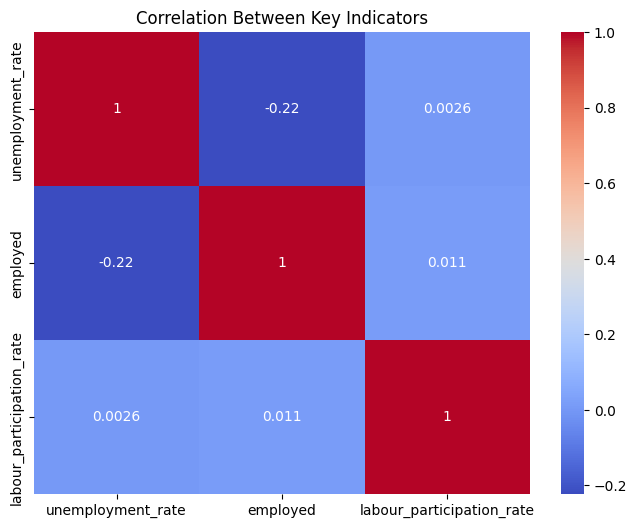

In [ ]:
plt.figure(figsize=(8,6))
sns.heatmap(df[['unemployment_rate', 'employed', 'labour_participation_rate']].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Between Key Indicators")
plt.show()
